In [1]:
import pandas
weather = pandas.read_csv('BrisbaneDailyWeather.csv')
weather

,Date,MinTemp,MaxTemp,Rainfall
0,2022/02/13,18.6,29.3,7.2
1,2022/02/12,20.4,28.9,0.0
2,2022/02/11,19.1,31.3,0.0
3,2022/02/10,19.4,31.2,0.0
4,2022/02/09,18.6,30.0,0.0
...,...,...,...,...
8096,1999/12/15,17.0,27.0,0.0
8097,1999/12/14,17.0,26.0,0.2
8098,1999/12/13,19.0,24.0,0.8
8099,1999/12/12,18.0,29.0,37.0


In [6]:
# Example from Week 8 Practical Exercises ...
# min_temps = weather.groupby(pandas.cut(weather.MaxTemp, range(10, 45, 5))).MinTemp

In [7]:
weather.MaxTemp.describe()

count    8064.000000
mean       26.640650
std         3.801586
min        12.000000
25%        23.800000
50%        26.900000
75%        29.400000
max        41.700000
Name: MaxTemp, dtype: float64

In [9]:
bins = range(10, 45, 5)
bins

range(10, 45, 5)

In [10]:
list(bins)

[10, 15, 20, 25, 30, 35, 40]

In [11]:
pandas.cut(weather.MaxTemp, bins)

0       (25, 30]
1       (25, 30]
2       (30, 35]
3       (30, 35]
4       (25, 30]
          ...   
8096    (25, 30]
8097    (25, 30]
8098    (20, 25]
8099    (25, 30]
8100    (25, 30]
Name: MaxTemp, Length: 8101, dtype: category
Categories (6, interval[int64, right]): [(10, 15] < (15, 20] < (20, 25] < (25, 30] < (30, 35] < (35, 40]]

In [12]:
weather['MaxTempCategory'] = pandas.cut(weather.MaxTemp, bins)

In [13]:
weather

,Date,MinTemp,MaxTemp,Rainfall,MaxTempCategory
0,2022/02/13,18.6,29.3,7.2,"(25, 30]"
1,2022/02/12,20.4,28.9,0.0,"(25, 30]"
2,2022/02/11,19.1,31.3,0.0,"(30, 35]"
3,2022/02/10,19.4,31.2,0.0,"(30, 35]"
4,2022/02/09,18.6,30.0,0.0,"(25, 30]"
...,...,...,...,...,...
8096,1999/12/15,17.0,27.0,0.0,"(25, 30]"
8097,1999/12/14,17.0,26.0,0.2,"(25, 30]"
8098,1999/12/13,19.0,24.0,0.8,"(20, 25]"
8099,1999/12/12,18.0,29.0,37.0,"(25, 30]"


In [14]:
weather.groupby(weather.MaxTempCategory).MinTemp.mean()

MaxTempCategory
(10, 15]    11.350000
(15, 20]    11.323377
(20, 25]    12.427682
(25, 30]    17.697548
(30, 35]    21.160028
(35, 40]    22.120896
Name: MinTemp, dtype: float64

<AxesSubplot:xlabel='MaxTempCategory'>

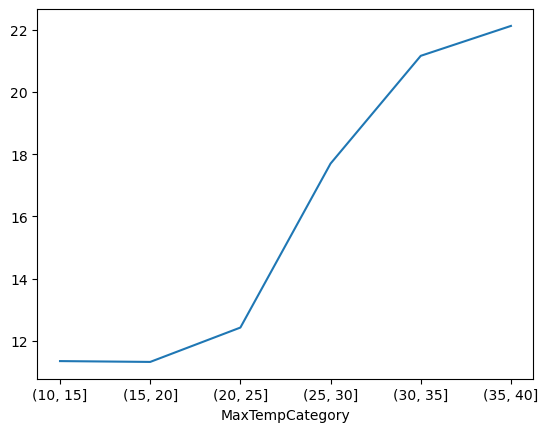

In [15]:
weather.groupby(weather.MaxTempCategory).MinTemp.mean().plot()

In [16]:
weather.groupby(weather.MaxTempCategory).MinTemp.std()

MaxTempCategory
(10, 15]    1.590912
(15, 20]    3.300040
(20, 25]    3.437856
(25, 30]    3.317068
(30, 35]    2.548833
(35, 40]    2.750512
Name: MinTemp, dtype: float64

In [17]:
MinTempsByMaxTemp = weather.groupby(weather.MaxTempCategory).MinTemp

In [20]:
MinTempsByMaxTemp.mean()

MaxTempCategory
(10, 15]    11.350000
(15, 20]    11.323377
(20, 25]    12.427682
(25, 30]    17.697548
(30, 35]    21.160028
(35, 40]    22.120896
Name: MinTemp, dtype: float64

In [21]:
MinTempsByMaxTemp.std()

MaxTempCategory
(10, 15]    1.590912
(15, 20]    3.300040
(20, 25]    3.437856
(25, 30]    3.317068
(30, 35]    2.548833
(35, 40]    2.750512
Name: MinTemp, dtype: float64

In [19]:
MinTempsByMaxTemp.agg(['mean','std','min', 'max'])

,mean,std,min,max
MaxTempCategory,,,,
"(10, 15]",11.350000,1.590912,8.3,12.4
"(15, 20]",11.323377,3.300040,3.0,17.8
"(20, 25]",12.427682,3.437856,2.6,22.9
"(25, 30]",17.697548,3.317068,5.9,26.1
"(30, 35]",21.160028,2.548833,11.0,28.0
"(35, 40]",22.120896,2.750512,13.1,27.3


<AxesSubplot:xlabel='MaxTempCategory'>

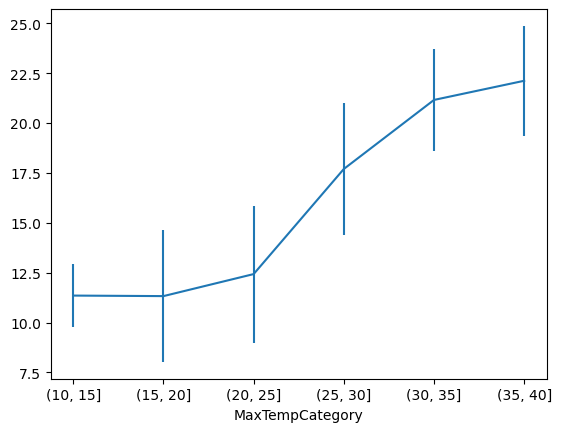

In [22]:
MinTempsByMaxTemp.mean().plot(yerr=MinTempsByMaxTemp.std())

<AxesSubplot:xlabel='MaxTemp'>

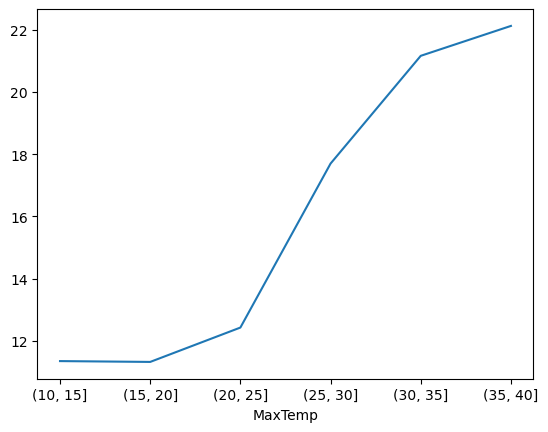

In [24]:
weather.groupby(pandas.cut(weather.MaxTemp, range(10, 45, 5))).MinTemp.mean().plot()

<AxesSubplot:xlabel='MaxTemp'>

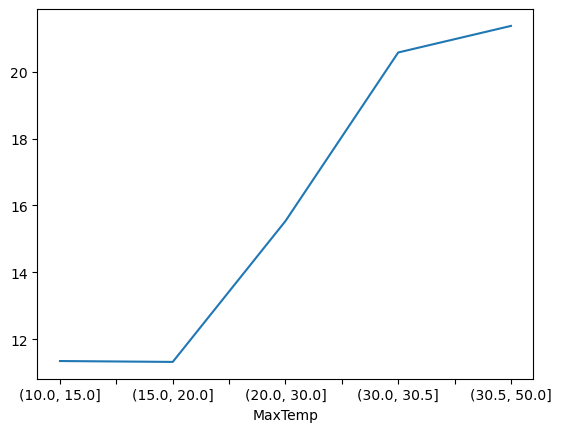

In [25]:
weather.groupby(pandas.cut(weather.MaxTemp, [10,15,20, 30, 30.5, 50])).MinTemp.mean().plot()

In [ ]:
# Try creating some examples of your own ...